# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину. 
Шаги для выбора локации обычно такие:
В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
Строят модель для предсказания объёма запасов в новых скважинах;
Выбирают скважины с самыми высокими оценками значений;
Определяют регион с максимальной суммарной прибылью отобранных скважин.
Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

1. Загрузите и подготовьте данные. Поясните порядок действий.
2. Обучите и проверьте модель для каждого региона:

   - Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
   - Обучите модель и сделайте предсказания на валидационной выборке.
   - Сохраните предсказания и правильные ответы на валидационной выборке.
   - Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
   - Проанализируйте результаты.
   
   
3. Подготовьтесь к расчёту прибыли:

   - Все ключевые значения для расчётов сохраните в отдельных переменных.
   - Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
   - Напишите выводы по этапу подготовки расчёта прибыли.
   
   
4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

   - Выберите скважины с максимальными значениями предсказаний. 
   - Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
   - Рассчитайте прибыль для полученного объёма сырья.
   
   
5. Посчитайте риски и прибыль для каждого региона:

   - Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
   - Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
   - Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

**Условия задачи:**
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

## Загрузка и подготовка данных

In [31]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
pth1 = '/datasets/'
pth2 = 'C:/Users/Солнышко/Documents/'
pth3 = 'C:/Users/Home/Documents/Яндекс/'

if os.path.exists(pth1):
    df1 = pd.read_csv(pth1 +'geo_data_0.csv')
    df2 = pd.read_csv(pth1 +'geo_data_1.csv')
    df3 = pd.read_csv(pth1 +'geo_data_2.csv')
elif os.path.exists(pth2):
    df1 = pd.read_csv(pth2 +'geo_data_0.csv')
    df2 = pd.read_csv(pth2 +'geo_data_1.csv')
    df3 = pd.read_csv(pth2 +'geo_data_2.csv')
elif os.path.exists(pth3):
    df1 = pd.read_csv(pth3 +'geo_data_0.csv')
    df2 = pd.read_csv(pth3 +'geo_data_1.csv')
    df3 = pd.read_csv(pth3 +'geo_data_2.csv')
else:
    print('Something is wrong')

In [4]:
# сбор данных о датафрейме:
def data_info(data):
    print(f'''
    ----------------------------------------
    Первые строки датафрейма:
    ----------------------------------------''')
    display(data.head())
    print(f'''
    ----------------------------------------
    Последние строки датафрейма:
    ----------------------------------------''')
    display(data.tail())
    print(f'''
    ----------------------------------------
    Общая информация:
    ----------------------------------------''')
    print(data.info())
    print(f'''
    ----------------------------------------
    Дупликаты:
    ----------------------------------------''')
    print(data.duplicated().sum())
    print(f'''
    ----------------------------------------
    Пропуски:
    ----------------------------------------''')
    display(round(data.isna().sum(),))
    print(f'''
    ----------------------------------------
    И немного статистических данных:
    ----------------------------------------''')
    print(data.describe(include='all'))      

In [5]:
datas = [df1, df2, df3]
df1.name, df2.name, df3.name = 'Регион 1','Регион 2','Регион 3'
for database in datas:
    print('------------------------------------')
    print(database.name)
    display(data_info(database))

------------------------------------
Регион 1

    ----------------------------------------
    Первые строки датафрейма:
    ----------------------------------------


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



    ----------------------------------------
    Последние строки датафрейма:
    ----------------------------------------


,id,f0,f1,f2,product
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246



    ----------------------------------------
    Общая информация:
    ----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

    ----------------------------------------
    Дупликаты:
    ----------------------------------------
0

    ----------------------------------------
    Пропуски:
    ----------------------------------------


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


    ----------------------------------------
    И немного статистических данных:
    ----------------------------------------
            id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99990            NaN            NaN            NaN            NaN
top      fiKDv            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       0.500419       0.250143       2.502647      92.500000
std        NaN       0.871832       0.504433       3.248248      44.288691
min        NaN      -1.408605      -0.848218     -12.088328       0.000000
25%        NaN      -0.072580      -0.200881       0.287748      56.497507
50%        NaN       0.502360       0.250252       2.515969      91.849972
75%        NaN       1.073581       0.700646       4.715088     128.564089
max        NaN       2.362331       1.343769   

None

------------------------------------
Регион 2

    ----------------------------------------
    Первые строки датафрейма:
    ----------------------------------------


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



    ----------------------------------------
    Последние строки датафрейма:
    ----------------------------------------


,id,f0,f1,f2,product
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364
99999,relB0,-3.426139,-7.794274,-0.003299,3.179103



    ----------------------------------------
    Общая информация:
    ----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

    ----------------------------------------
    Дупликаты:
    ----------------------------------------
0

    ----------------------------------------
    Пропуски:
    ----------------------------------------


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


    ----------------------------------------
    И немного статистических данных:
    ----------------------------------------
            id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99996            NaN            NaN            NaN            NaN
top      wt4Uk            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       1.141296      -4.796579       2.494541      68.825000
std        NaN       8.965932       5.119872       1.703572      45.944423
min        NaN     -31.609576     -26.358598      -0.018144       0.000000
25%        NaN      -6.298551      -8.267985       1.000021      26.953261
50%        NaN       1.153055      -4.813172       2.011479      57.085625
75%        NaN       8.621015      -1.332816       3.999904     107.813044
max        NaN      29.421755      18.734063   

None

------------------------------------
Регион 3

    ----------------------------------------
    Первые строки датафрейма:
    ----------------------------------------


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



    ----------------------------------------
    Последние строки датафрейма:
    ----------------------------------------


,id,f0,f1,f2,product
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253
99999,V9kWn,-2.551421,-2.025625,6.090891,102.775767



    ----------------------------------------
    Общая информация:
    ----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

    ----------------------------------------
    Дупликаты:
    ----------------------------------------
0

    ----------------------------------------
    Пропуски:
    ----------------------------------------


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


    ----------------------------------------
    И немного статистических данных:
    ----------------------------------------
            id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99996            NaN            NaN            NaN            NaN
top      VF7Jo            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       0.002023      -0.002081       2.495128      95.000000
std        NaN       1.732045       1.730417       3.473445      44.749921
min        NaN      -8.760004      -7.084020     -11.970335       0.000000
25%        NaN      -1.162288      -1.174820       0.130359      59.450441
50%        NaN       0.009424      -0.009482       2.484236      94.925613
75%        NaN       1.158535       1.163678       4.858794     130.595027
max        NaN       7.238262       7.844801   

None

Мы видим идентификационный номер, три признака и объём запасов в скважине (тыс. баррелей). Мы видим, что все признаки во всех регионах имеют разные масштабы => нужно сделать масштабирование.

Явных дупликатов нет.

In [7]:
for database in datas:
    print(f'''{database.name}
Уникальные значения:{len(database['id'].unique())}
Все значения: {len(database['id'])}''')

Регион 1
Уникальные значения:99990
Все значения: 100000
Регион 2
Уникальные значения:99996
Все значения: 100000
Регион 3
Уникальные значения:99996
Все значения: 100000


Однако неявные дупликаты есть - несколько строк повторяются по колонке 'id'

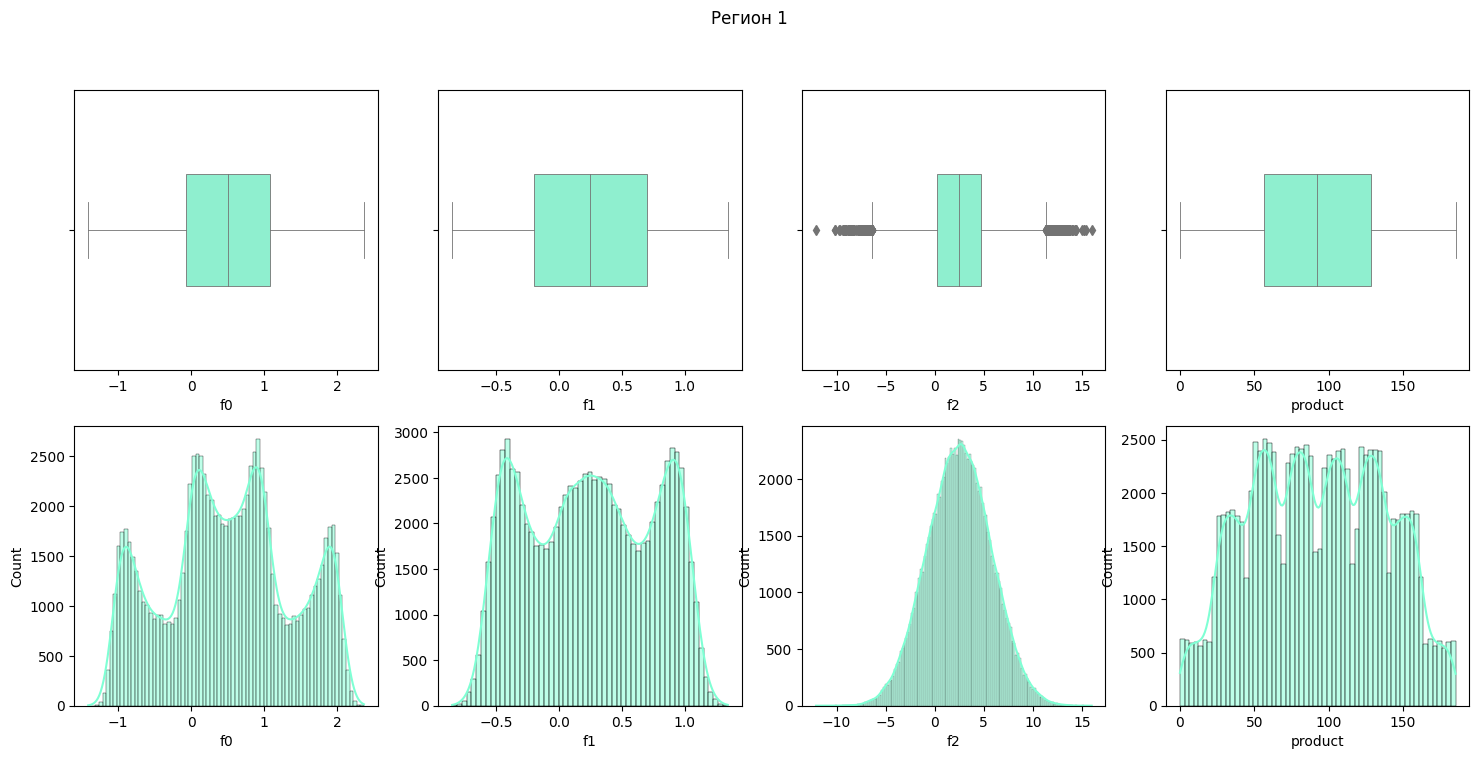

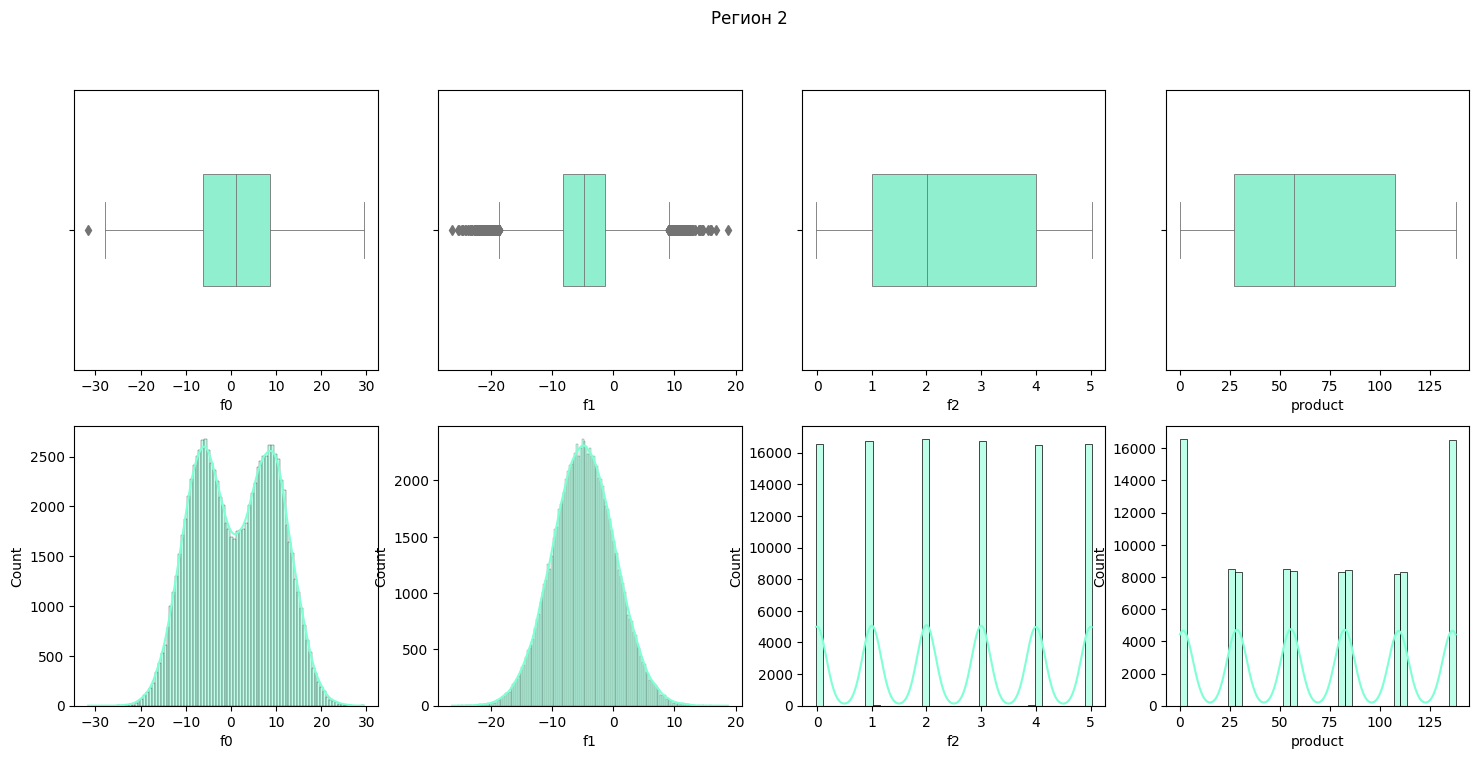

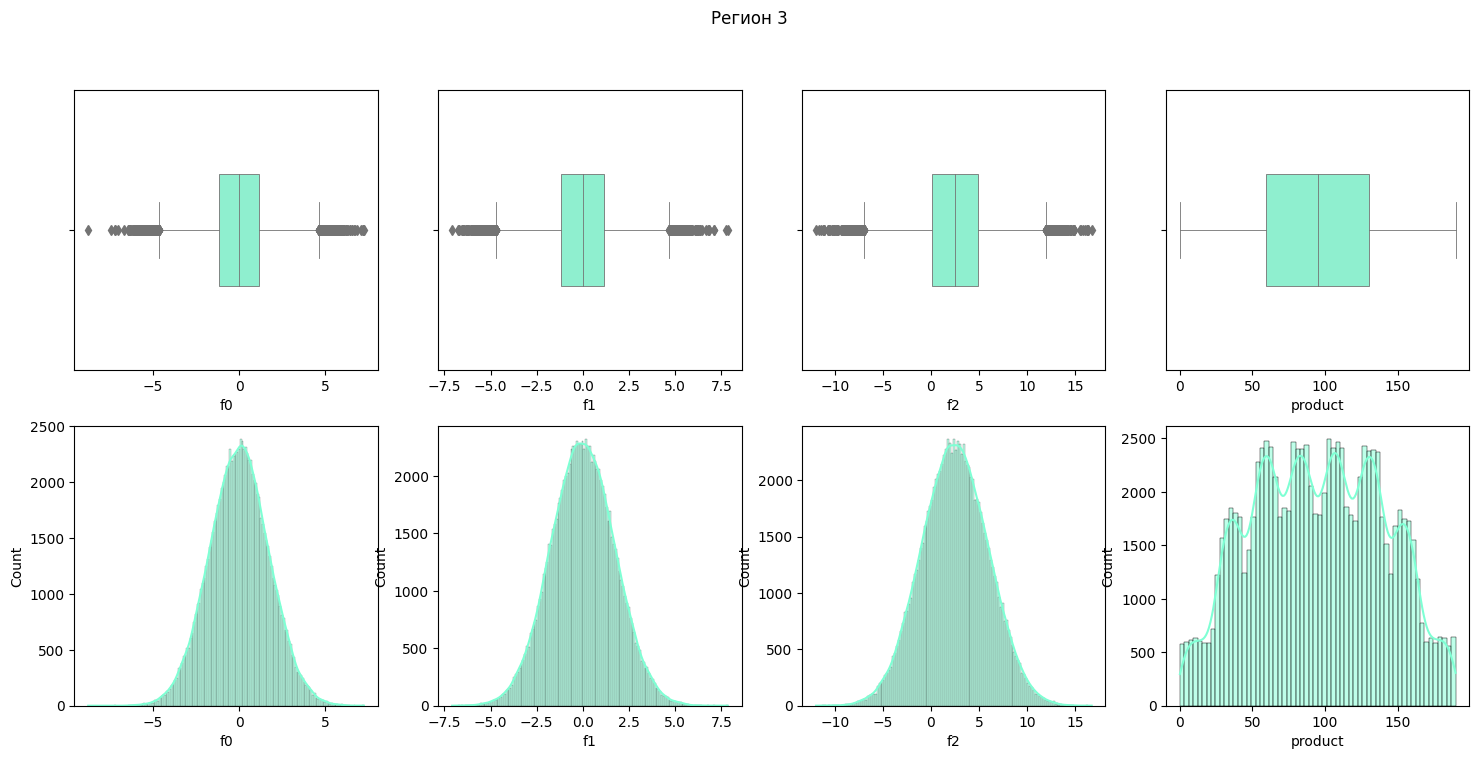

In [8]:
for database in datas:
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
    fig.suptitle(database.name)
    for i, feature in enumerate(database.columns[1:]):
        sns.boxplot(x=database[feature], color='aquamarine', linewidth=0.6, width=0.4,ax=ax[0][i])
        sns.histplot(x=database[feature], kde=True, color='aquamarine',ax=ax[1][i])

Достаточно сильно бросается в глаза корреляция признаков f2 и product в Регионе №2.

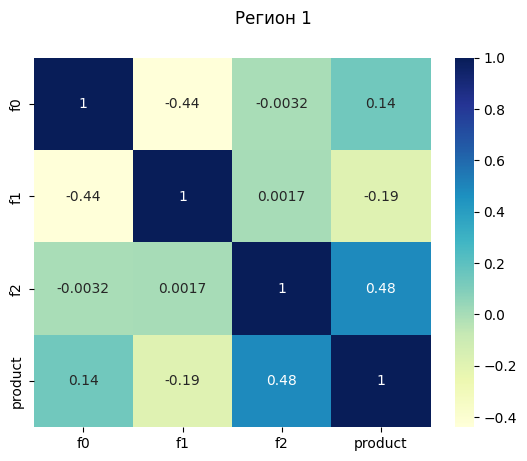

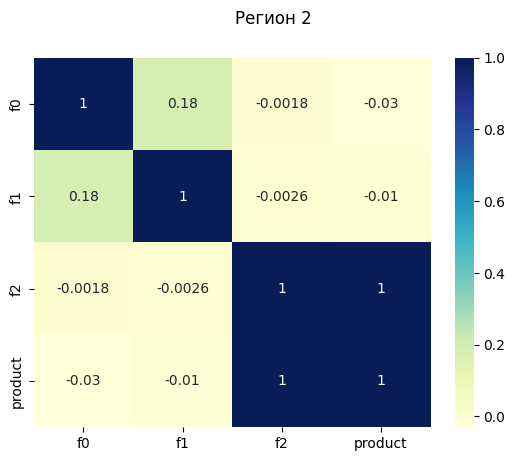

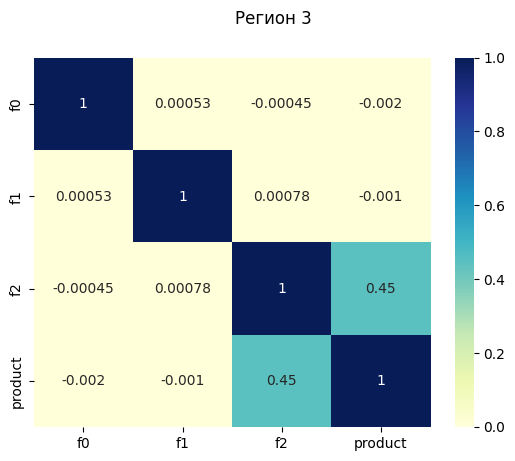

In [50]:
for database in datas:
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.suptitle(database.name)
    sns.heatmap(database.corr(), annot=True, cmap='YlGnBu')
    plt.show()

В **первом** регионе:

- прослеживается отрицательная коррелиция между `f0` и `f1`
- прослеживается положительная корреляция между `f2` и `product` - то есть, зная признак `f2` мы можем чуть более точно сказать, как будет изменяться количество наших запасов


Во **втором** регионе:

- видно прямую корреляцию между `f2` и `product`, остальные данные либо не коррелируют практически вообще, либо корреляция сложная, и так просто её не увидеть


В **третьем** регионе:

- также сильно на `product` влияет признак `f2`


Можем сделать вывод, что зная признак `f2`, чем бы он не являлся, мы можем немного точнее оценить, каким будет распределение ресурса в этом регионе.

В данных достаточно много выбросов, поэтому масштабирование будем проводить RobustScaler, так как он более устойчив к выбросам. Однако перед этим избавимся от колонки '*id*', так как она неинформативна

In [16]:
df1 = df1.drop('id',axis=1)
df2 = df2.drop('id',axis=1)
df3 = df3.drop('id',axis=1)

Таким образом, данные оценены и убраны ненужные колонки - можно приступать к обучению модели.

## Обучение и проверка модели

In [54]:
# функция для обучения модели
scaler = RobustScaler()

def predict_model(database):
    
    features = database.drop('product', axis=1)
    target = database['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                              target, test_size=0.25, random_state=12345)
    # Также проведем масштабирование признаков, с учетом выбросов:
    features_train = pd.DataFrame(scaler.fit_transform(features_train))
    features_valid = pd.DataFrame(scaler.transform(features_valid))
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    
    return predictions, target_valid

def print_stats(target, pred):
    print(f'''rmse: {(mean_squared_error(target, pred))**0.5}
-----------------------------------------
Фактический средний запас сырья: {target.mean()}
Предсказанный средний: {pred.mean()}
Разница между ними: {target.mean()-pred.mean()}
-----------------------------------------
Фактический медианный: {target.median()}
Предсказанный медианный: {np.median(pred)}
Разница между ними: {target.median()-np.median(pred)}''')

### Первый регион

Первоначально разделим данные на признаки и таргет, а также на обучающую и валидационную выборки:

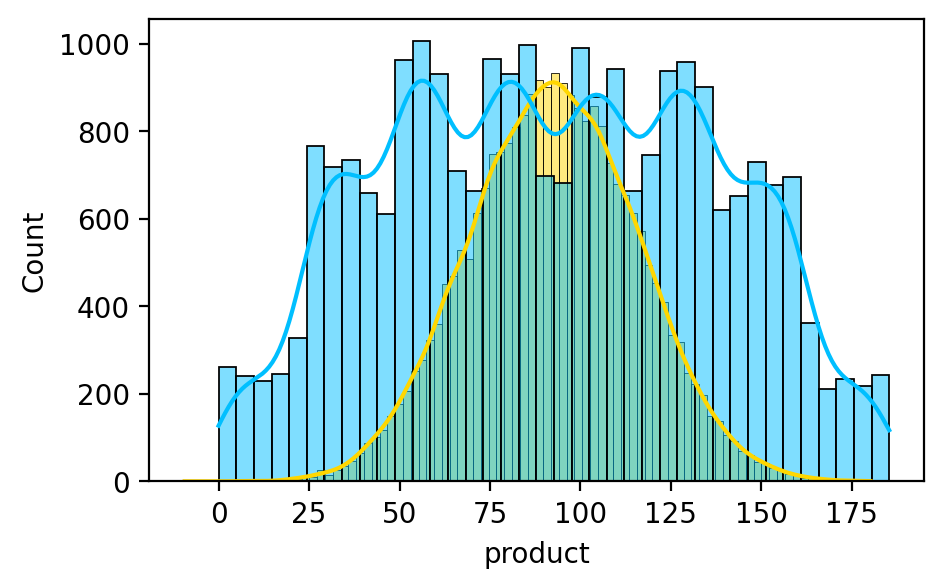

In [20]:
predictions_f, target_valid_f = predict_model(df1)
fig = plt.figure(figsize=(5,3), dpi=200)
sns.histplot(x=predictions_f, kde=True, color='gold')
sns.histplot(x=target_valid_f, kde=True, color='deepskyblue')
plt.show()

Средний баланс предсказанного сырья:

In [56]:
print_stats(target_valid_f, predictions_f)

rmse: 37.5794217150813
-----------------------------------------
Фактический средний запас сырья: 92.07859674082927
Предсказанный средний: 92.59256778438035
Разница между ними: -0.5139710435510807
-----------------------------------------
Фактический медианный: 90.89766445926102
Предсказанный медианный: 92.66188351790805
Разница между ними: -1.7642190586470292


Среднее и медиана практически совпадают, однако, смотря на график, модель не до конца поняла взаимосвязи в данных.

### Второй регион

Аналогично, сначала подготовим и разделим выборки:

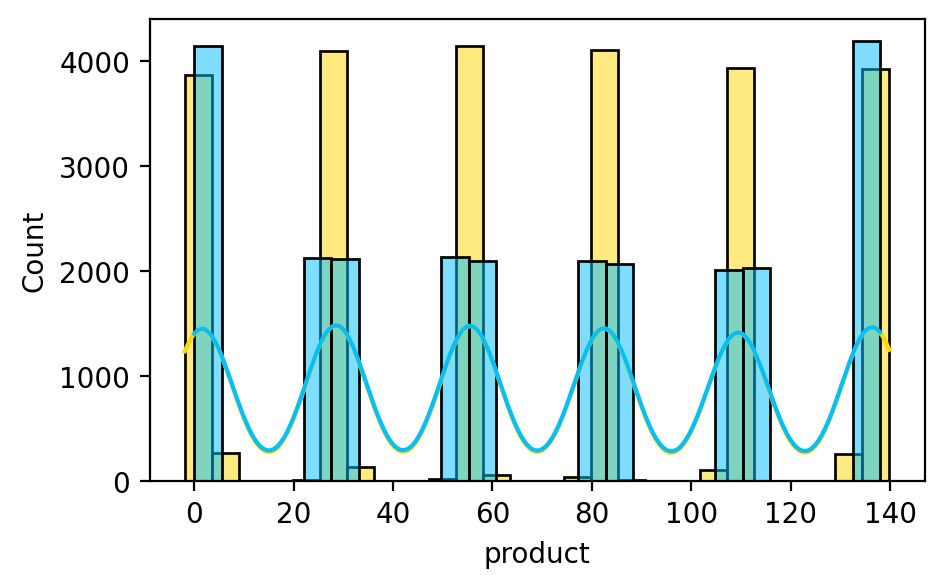

In [22]:
predictions_s, target_valid_s = predict_model(df2)
fig = plt.figure(figsize=(5,3), dpi=200)
sns.histplot(x=predictions_s, kde=True, color='gold')
sns.histplot(x=target_valid_s, kde=True, color='deepskyblue')
plt.show()

In [53]:
print_stats(target_valid_s, predictions_s)

rmse: 0.8930992867756167
-----------------------------------------
Фактический средний запас сырья: 68.72313602435997
Предсказанный средний: 68.72854689544602
Разница между ними: -0.00541087108604188
-----------------------------------------
Фактический медианный: 57.08562464628662
Предсказанный медианный: 57.851585882426974
Разница между ними: -0.765961236140356


Здесь мы видим достаточно низкий показатель ошибки - меньше единицы, что говорит о хорошем понимании модели данных этого региона (наглядно видно прямую корреляцию признаков f2 и product). Однако фактически, в этом регионе большая медиана меньше среднего, следовательно, достаточная часть скважин - находятся на уровне 57 тыс. баррелей.

### Третий регион

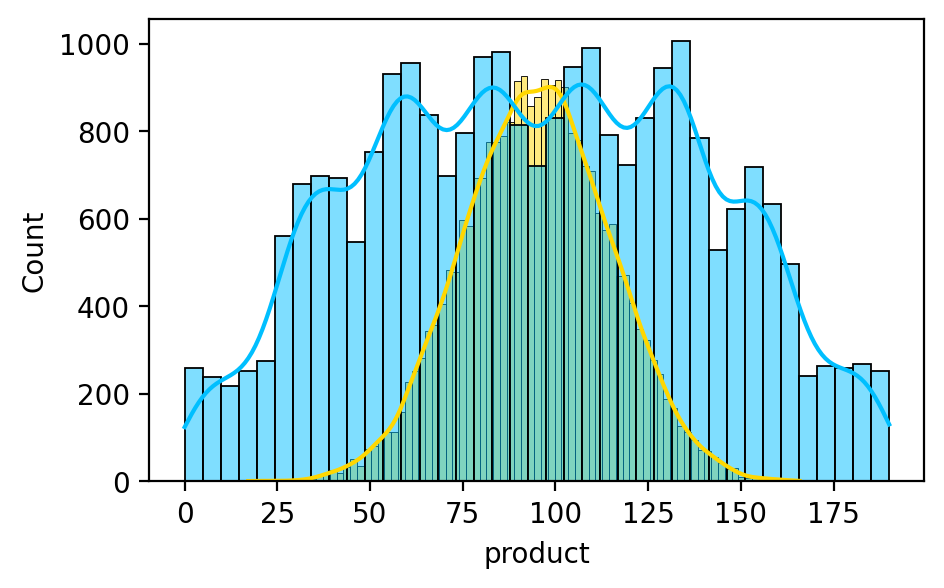

In [24]:
predictions_t, target_valid_t = predict_model(df3)
fig = plt.figure(figsize=(5,3), dpi=200)
sns.histplot(x=predictions_t, kde=True, color='gold')
sns.histplot(x=target_valid_t, kde=True, color='deepskyblue')
plt.show()

In [58]:
print_stats(target_valid_t, predictions_t)

rmse: 40.02970873393434
-----------------------------------------
Фактический средний запас сырья: 94.88423280885438
Предсказанный средний: 94.96504596800489
Разница между ними: -0.0808131591505088
-----------------------------------------
Фактический медианный: 94.97946818189787
Предсказанный медианный: 95.03120442123549
Разница между ними: -0.05173623933761462


В третьем регионе ошибка больше, чем в первом и втором. Однако предсказанный средний запас сырья в целом выше.

**Промежуточный вывод:**

Исходя из ныне имеющихся исследований, наименьшая ошибка rmse - во втором регионе. Скорее всего это произошло из-за прямой корреляции признака f2 и product. Но стоит учитывать, что и средний запас сырья там ниже в полтора раза. Однако, риски там тоже меньше - следовательно, это *более устойчивый для бизнеса вариант*.

## Подготовка к расчёту прибыли

In [59]:
BUDGET = 10**10
CELL_COST = 45 * 10**4

Если смотреть в общем, среднее количество вырабатываемой продукции по всему региону должно быть не менее 22.223, чтобы окупить все затраты на постройку:

In [60]:
BUDGET/CELL_COST

22222.222222222223

То есть, необходимо, чтобы 200 точек принесли не менее 111 единиц 'product' каждая (в пересчете - (111x200)*cell_cost >= budget) для безубыточного производства.

In [61]:
(BUDGET/CELL_COST)/200

111.11111111111111

**Промежуточный вывод**

Из всех регионов, ни один не удовлетворяет условию, а в регионе №2 средний запас сырья в 1,5 раза меньше необходимого для безубыточного производства

## Расчёт прибыли и рисков 

Для безубыточной добычи нефти необходимо, чтобы средние запасы в предполагаемом регионе были не менее 22.222

In [62]:
# функция для вычисления дохода:
def revenue(target, probabilities):
    prob_sorted = probabilities.sort_values(ascending=False) # сортируем по убыванию
    selected = target[prob_sorted.index][:200] # выбираем 200 лучших
    return ((selected.sum()*CELL_COST) - BUDGET)

In [63]:
state = np.random.RandomState(12345)
region = 1
# посчитаем прибыль и риски для всех трех регионов:
for database in [df1, df2, df3]:

    # определяем признаки и целевой признак:
    features = database.drop('product', axis=1)
    target = database['product']
    
    # разделяем датафрейм на выборки:
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                              target, test_size=0.25, random_state=12345)
    
    # масштабируем признаки:
    features_train = pd.DataFrame(scaler.fit_transform(features_train))
    features_valid = pd.DataFrame(scaler.transform(features_valid))
    
    # обучаем модель:
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    # предсказываем целевой признак на валидационной выборке:
    predictions = pd.Series(model.predict(features_valid))
    target_valid_pred = pd.Series(target_valid).reset_index(drop=True)
    
    values = []
    
    # bootstrap:
    for i in range(1000):
        target_subsample = target_valid_pred.sample(n=500, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample))
               
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risks = values.apply(lambda x: x < 0).sum()/len(values)*100
    
    # выводим все данные
    print(f'''Для региона {region}:
    Средняя выручка: {values.mean()}
    Доверительный интервал: {lower}:{upper}
    Риск: {risks}%
    ------------------------------------------''')
    region += 1

Для региона 1:
    Средняя выручка: 425938526.91059244
    Доверительный интервал: -102090094.83793654:947976353.3583689
    Риск: 6.0%
    ------------------------------------------
Для региона 2:
    Средняя выручка: 518259493.6973249
    Доверительный интервал: 128123231.43308444:953612982.0669085
    Риск: 0.3%
    ------------------------------------------
Для региона 3:
    Средняя выручка: 420194005.3440501
    Доверительный интервал: -115852609.16001143:989629939.8445739
    Риск: 6.2%
    ------------------------------------------


В данном случае, единственный возможный вариант для развития этой промышленности - второй регион, в котором и средняя выручка больше, чем  в остальных, и риски меньше. 

В первом и третьем регионах - риски > 2.5%, следовательно, они уже не подходят под искомые параметры.

# Итоговый вывод:

В ходе работы нам повезло (и данные у нас уже были подготовлены). Мы изучили их, посмотрели корреляцию данных - напрямую на количество продукта в регионах влияет признак `f2` - зная его, мы можем гораздо точнее предсказать объемы нашего ресурса.

Проведя исследование и обучив модель `Линейной регрессии` мы получили, что наименее рискованный (но и наименее наполненный) регион - второй. Он единстенный прошел порог риска (`=0.3%`) и средняя выручка там (предполагаемо) будет больше, чем в остальных 2х регионах, и доверительный интервал единственный не уходит в минус, следовательно именно ***второй регион можно рекомендовать к застройке***.